# Deep learning model for Forest-Cover-Classification

## Before we get into the model, let us ask ourselves if we should use a deep learning model.
## Is there enough data? And is this a sufficiently "hard" problem to apply this to?

### We have enough data, this information will be coming from the US Forest Service Region 2 Resource Information System data. And let us assume it is sufficiently hard.

#### There are 7 types of cover:
#### -Spruce/Fir
#### -Lodgepole Pine
#### -Ponderosa Pine
#### -Cottonwood/Willow
#### -Aspen
#### -Douglas Fir
#### -Krummholz

### We will also be using tabular data gathered from US Geological Survey and US Forest Service that qualitatively describe independent variables such as wilderness areas and soil types.

##### This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so existing forest cover types are mainly a result of ecological processes rather than forest management practices.

In [1]:
## First we will want to import the libraries we will be using
import numpy as np

import tensorflow as tf
from tensorflow import keras

import pandas as pd

from matplotlib import pyplot as plt

In [2]:
##Let's put our data into a dataframe and begin some data exploratory analysis.
path = 'C:\\Users\\ashri\\Deeplearning files\\forest_cover_data\\cover_data.csv'
cover_df = pd.read_csv(path)
cover_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
##Let's also see how many examples we have
cover_df.shape

(581012, 55)

In [4]:
## We can see our data has 55 features per input but let's first go through and see all of the columns to see if we will be 
## keeping them all before we designate our input_shape variable.
column_list = [x for x in cover_df.columns.to_list()]
for column in column_list:
    print(column)

Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
class


In [5]:
## All of the columns are valid inputs, so let's now do some data cleaning.
## First let's see if we are missing any data
cover_df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
##Let's go ahead and get the statistics for the dataframe and its features
cover_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
## Let's go ahead and and separate our X and Y datasets. Class will be our Y and X will be all of our features being used to 
## predict which class it will fall into.
X = cover_df.iloc[:,0:-1] #Select all rows and the select all columns except for the last one
Y = cover_df.iloc[:,-1]   #Select all rows and only select the last column

In [9]:
from collections import Counter
print(Counter(Y)) ## Just checking to make sure we have 7 classes and that we have enough examples in each. As we can see,
## we have the lease amount of examples in classification 4 which is the Cottonwood/Willow designation. Because it is so low
## and because we don't have the same amount of examples in every class, we want to make sure we get equal representation in
## the train and test sets, so we will stratify it using Y.

Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


In [10]:
#Now let's split our data into training and val datasets.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.1, shuffle = True, stratify = Y) 

In [11]:
## As we can see from the statistics, some features are between 1-0 and others are in the range of 1000's. This can make 
## learning difficult as the distance between points can be greater for some features and less for others, making the model
## focus on the bigger distances disproportionately more than the smaller scaled features. So here I am going to use a 
## min-max scaler to put all numbers between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
## We did fit_transform on the X_train because we want the max and the min from it since we are training on it
## and we only did transform on X_test because we want to use the X_test min and max to scale the test data.

In [12]:
## Now let's build a model! Since this is tabular data we won't be using any Conv layers, RNN layers, or building complex models
## such as GAN's and Transformers. This will strickly be a Dense feed foward sequential model. 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

In [14]:
def build_my_model():
    model = Sequential()
    model.add(Input(shape=X_train.shape[1]))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(8, activation = 'softmax'))
    return model

In [15]:
model = build_my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14080     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [16]:
##Now let's compile the model but first let's think about what type of loss function to use. 
## If we are doing regression (prediciting a continuous output), we will want to use something like mean squared error,
## but it seems we are not predicting a continuous number, we are predicitng 1-7, so we are doing a classification problem, which
## means we will want to use either 'sparse_categorical_crossentropy' if we are using integers or 'categorical_crossentropy'
## if we are using one_hot_encoded probabilities. 
## we are going to use sparse because we are using integers and I did not change the Y's to be one hot encoded.

In [17]:
train_examples = X_train.shape[0] ## we will need the number of examples (the rows) for steps_per_epoch
val_examples = X_test.shape[0] ## similarly we will need the number of examples for validation_steps
BATCH_SIZE = 64

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [19]:
#Let's implement a call back that will live update the metrics and loss per epoch
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [20]:
callbacks_list = [PlotLearning()]

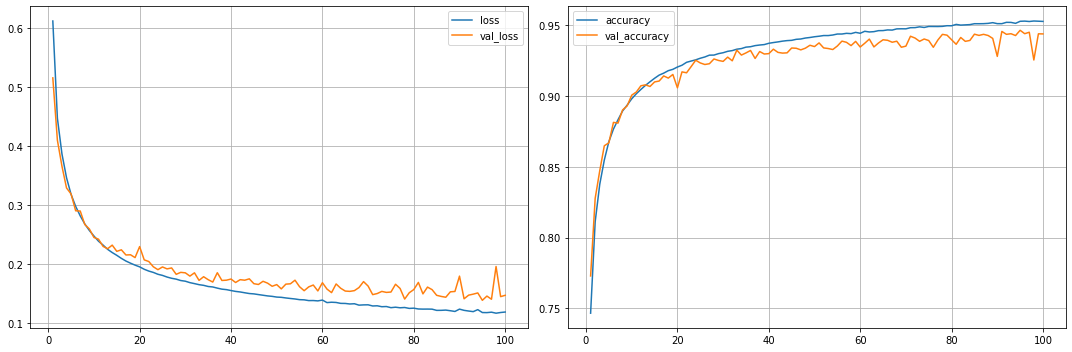

8170/8170 [==============================] - 40s 5ms/step - loss: 0.1189 - accuracy: 0.9529 - val_loss: 0.1472 - val_accuracy: 0.9440


In [21]:
history = model.fit(x = X_train, 
          y = Y_train, 
          epochs = 100, 
          batch_size = BATCH_SIZE, 
          steps_per_epoch = train_examples/BATCH_SIZE, 
          validation_data = (X_test, Y_test),
          validation_batch_size = BATCH_SIZE,
          validation_steps = val_examples/BATCH_SIZE,
          callbacks = callbacks_list)

### Originally I had my model defined with two Hidden layers with 64 units and one output layer with the 8 choices but when training it was saying the loss was 'nan' so I tried increasing the batch_size to a higher number. Reasoning being I thought the loss on one object was to high and that more examples per batch may help it optimize quicker. Then I decided to make a more complex model starting with a dense layer of 256 and going down by powers of 2 until we got to 8 and then to the output layer. This brought the loss down and was able to capture the complexity of the data.

In [28]:
#Now let's make a classification report
from sklearn.metrics import classification_report

classes = ['Spruce/Fir', 
           'Lodgepole Pine',
           'Ponderosa Pine', 
           'Cottonwood/Willow',
           'Aspen', 
           'Douglas-fir', 
           'Krummholz']

yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis = 1)
print(classification_report(Y_test, yhat, target_names = classes))

1816/1816 [==============================] - 3s 2ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.93      0.96      0.94     21184
   Lodgepole Pine       0.96      0.95      0.95     28331
   Ponderosa Pine       0.97      0.90      0.94      3575
Cottonwood/Willow       0.88      0.83      0.85       275
            Aspen       0.87      0.82      0.85       949
      Douglas-fir       0.88      0.92      0.90      1737
        Krummholz       0.96      0.93      0.95      2051

         accuracy                           0.94     58102
        macro avg       0.92      0.90      0.91     58102
     weighted avg       0.94      0.94      0.94     58102



In [29]:
print(Counter(Y))

Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


In [30]:
# I am a little surpised that the model does the worst on category 5 (Aspen) because we have quite alot of examples of it. 
# In contrast, Category 4 (Cottonwood/Willow) has only 28% of the examples that Cat 5 has and the model performs much better
# at prediciting in terms of Recall (TP/(TP+FN)) and F1 (2/((1/P) + (1/R))). 